<a href="https://colab.research.google.com/github/tsara890/minithings/blob/main/modelspractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision

import torchvision.datasets as datasets
import torchvision.transforms as transforms

import pathlib

data_dir = pathlib.Path("petdata/")

In [2]:
train_data = datasets.OxfordIIITPet(root=data_dir,
                                    split="trainval",
                                    download="True")

test_data = datasets.OxfordIIITPet(root=data_dir,
                                   split="test",
                                   download="True")

100%|██████████| 791918971/791918971 [00:26<00:00, 29727871.66it/s]


Extracting petdata/oxford-iiit-pet/images.tar.gz to petdata/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 16356823.54it/s]


Extracting petdata/oxford-iiit-pet/annotations.tar.gz to petdata/oxford-iiit-pet


In [3]:
train_data.classes

['Abyssinian',
 'American Bulldog',
 'American Pit Bull Terrier',
 'Basset Hound',
 'Beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'Boxer',
 'British Shorthair',
 'Chihuahua',
 'Egyptian Mau',
 'English Cocker Spaniel',
 'English Setter',
 'German Shorthaired',
 'Great Pyrenees',
 'Havanese',
 'Japanese Chin',
 'Keeshond',
 'Leonberger',
 'Maine Coon',
 'Miniature Pinscher',
 'Newfoundland',
 'Persian',
 'Pomeranian',
 'Pug',
 'Ragdoll',
 'Russian Blue',
 'Saint Bernard',
 'Samoyed',
 'Scottish Terrier',
 'Shiba Inu',
 'Siamese',
 'Sphynx',
 'Staffordshire Bull Terrier',
 'Wheaten Terrier',
 'Yorkshire Terrier']

In [4]:
import random

image_path = data_dir / "oxford-iiit-pet" / "images"
target_classes = ["Abyssinian", "beagle", "boxer", "Ragdoll"]

def get_subset(image_path=image_path,
               data_splits=["trainval", "test"],
               target_classes=target_classes,
               amount=0.2):
  label_splits = {}

  for data_split in data_splits:
    print(f"Creating image split for: {data_split}")
    label_path = data_dir / "oxford-iiit-pet" / "annotations" / f"{data_split}.txt"
    with open(label_path, "r") as f:
      labels = [line.strip("\n") for line in f.readlines() if line.split("_")[0] in target_classes]

    #if data_split == "test":
      #num_to_sample = round(amount*len(labels))
    #else:
      #num_to_sample = round(amount*2*len(labels))
    print(f"Getting {len(labels)} images for {data_split}...")
    #sampled_images = random.sample(labels, k=num_to_sample)

    image_paths = [pathlib.Path(str(image_path / str(sample_image)).split(" ")[0] + ".jpg") for sample_image in labels]
    label_splits[data_split] = image_paths
  return label_splits

label_splits = get_subset()


Creating image split for: trainval
Getting 400 images for trainval...
Creating image split for: test
Getting 397 images for test...


In [5]:
label_splits["trainval"][:10]

[PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_102.jpg'),
 PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_103.jpg'),
 PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_104.jpg'),
 PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_105.jpg'),
 PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_106.jpg'),
 PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_107.jpg'),
 PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_108.jpg'),
 PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_109.jpg')]

In [6]:
target_dir_name = "petdata/dog_and_cat"
target_dir = pathlib.Path(target_dir_name)
target_dir.mkdir(parents=True, exist_ok=True)


In [7]:
img_path = label_splits["trainval"][0]
img_path.name, img_path.parent.stem

('Abyssinian_100.jpg', 'images')

In [8]:
str(img_path.name).split(" ")[0].split("_")[0]

'Abyssinian'

In [9]:
img_path

PosixPath('petdata/oxford-iiit-pet/images/Abyssinian_100.jpg')

In [10]:
dest_dir_test = target_dir / "train" / str(img_path.name).split("_")[0] / img_path.name
dest_dir_test, dest_dir_test.parent

(PosixPath('petdata/dog_and_cat/train/Abyssinian/Abyssinian_100.jpg'),
 PosixPath('petdata/dog_and_cat/train/Abyssinian'))

In [11]:
import shutil

for label_split in label_splits.keys():
  for image_path in label_splits[str(label_split)]:
    dest_dir = target_dir / label_split / str(image_path.name).split("_")[0] / image_path.name
    if not dest_dir.parent.is_dir():
      dest_dir.parent.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Copying {image_path} to {dest_dir}...")
    shutil.copy2(image_path, dest_dir)


[INFO] Copying petdata/oxford-iiit-pet/images/Abyssinian_100.jpg to petdata/dog_and_cat/trainval/Abyssinian/Abyssinian_100.jpg...
[INFO] Copying petdata/oxford-iiit-pet/images/Abyssinian_101.jpg to petdata/dog_and_cat/trainval/Abyssinian/Abyssinian_101.jpg...
[INFO] Copying petdata/oxford-iiit-pet/images/Abyssinian_102.jpg to petdata/dog_and_cat/trainval/Abyssinian/Abyssinian_102.jpg...
[INFO] Copying petdata/oxford-iiit-pet/images/Abyssinian_103.jpg to petdata/dog_and_cat/trainval/Abyssinian/Abyssinian_103.jpg...
[INFO] Copying petdata/oxford-iiit-pet/images/Abyssinian_104.jpg to petdata/dog_and_cat/trainval/Abyssinian/Abyssinian_104.jpg...
[INFO] Copying petdata/oxford-iiit-pet/images/Abyssinian_105.jpg to petdata/dog_and_cat/trainval/Abyssinian/Abyssinian_105.jpg...
[INFO] Copying petdata/oxford-iiit-pet/images/Abyssinian_106.jpg to petdata/dog_and_cat/trainval/Abyssinian/Abyssinian_106.jpg...
[INFO] Copying petdata/oxford-iiit-pet/images/Abyssinian_107.jpg to petdata/dog_and_cat/tr

In [12]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(target_dir)

There 2 directories and 0 images in petdata/dog_and_cat
There 4 directories and 0 images in petdata/dog_and_cat/trainval
There 0 directories and 100 images in petdata/dog_and_cat/trainval/boxer
There 0 directories and 100 images in petdata/dog_and_cat/trainval/Ragdoll
There 0 directories and 100 images in petdata/dog_and_cat/trainval/beagle
There 0 directories and 100 images in petdata/dog_and_cat/trainval/Abyssinian
There 4 directories and 0 images in petdata/dog_and_cat/test
There 0 directories and 99 images in petdata/dog_and_cat/test/boxer
There 0 directories and 100 images in petdata/dog_and_cat/test/Ragdoll
There 0 directories and 100 images in petdata/dog_and_cat/test/beagle
There 0 directories and 98 images in petdata/dog_and_cat/test/Abyssinian


In [13]:
zip_file_name = data_dir / "dog_and_cat_imgs"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/content/petdata/dog_and_cat_imgs.zip'

In [14]:
train_dir = data_dir / "dog_and_cat" / "trainval"
test_dir = data_dir / "dog_and_cat" / "test"

train_dir, test_dir

(PosixPath('petdata/dog_and_cat/trainval'),
 PosixPath('petdata/dog_and_cat/test'))

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [16]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [17]:
training_data = datasets.ImageFolder(root=train_dir,
                                     transform=train_transform,
                                     target_transform=None)

testing_data = datasets.ImageFolder(root=test_dir,
                                    transform=test_transform,
                                    target_transform=None)

training_data, testing_data

(Dataset ImageFolder
     Number of datapoints: 400
     Root location: petdata/dog_and_cat/trainval
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 397
     Root location: petdata/dog_and_cat/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [18]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=training_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=testing_data,
                             batch_size=32,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f63a04c6da0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f63a04c6ad0>)

In [19]:
imgs, labels = next(iter(train_dataloader))
img, label = imgs[0], labels[0]

img.shape, label.shape


(torch.Size([3, 224, 224]), torch.Size([]))

In [20]:
class_names = training_data.classes

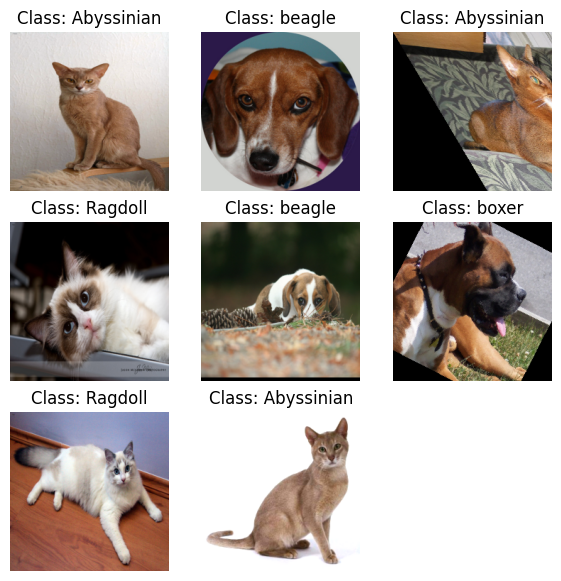

In [21]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(7, 7))
for i in range(1, 9):
  imgs, labels = next(iter(train_dataloader))
  img, label = imgs[0], labels[0]
  plt.subplot(3, 3, i)
  plt.imshow(img.permute(1, 2, 0))
  plt.title(f"Class: {class_names[label]}")
  plt.axis(False)

In [22]:
from torch import nn

In [62]:
class VGG16(nn.Module):
    def __init__(self, input_shape:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.linear_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=512*7*7, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU()
        )
        self.classifier = nn.Linear(in_features=4096, out_features=output_shape)

    def forward(self, x):
      x =  self.conv_block_1(x)
      x =  self.conv_block_2(x)
      x =  self.conv_block_3(x)
      x =  self.conv_block_4(x)
      x =  self.conv_block_5(x)
      #print(f"Shape after the 5 conv blocks: {x.shape}")
      x = self.linear_layer(x)
      #print(f"Shape after linear_layer: {x.shape}")
      x = self.classifier(x)
      #print(f"Shape after classifier: {x.shape}")
      return x

In [63]:
model = VGG16(input_shape=3, output_shape=4).to(device)

In [64]:
example_img, example_label = next(iter(train_dataloader))

model.eval()
with torch.inference_mode():
  pred = model(example_img.to(device))
  print(pred)


tensor([[ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118,  0.0043],
        [ 0.0060,  0.0058, -0.0118

In [65]:
def train_step(model:nn.Module, train_dataloader:torch.utils.data.DataLoader, loss_fn:nn.Module, optimizer:torch.optim.Optimizer, accuracy_fn, device:torch.device=device):
  model.train()
  train_loss, train_acc = 0, 0
  for X, y in train_dataloader:
    X, y = X.to(device), y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, torch.argmax(pred, dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  return train_loss, train_acc*100

def test_step(model:nn.Module, test_dataloader:torch.utils.data.DataLoader, loss_fn:nn.Module, accuracy_fn, device:torch.device=device):
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y)
      test_acc += accuracy_fn(y, torch.argmax(pred, dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    return test_loss, test_acc*100


In [66]:
def train(model:nn.Module, num_epochs:int, train_dataloader:torch.utils.data.DataLoader, test_dataloader:torch.utils.data.DataLoader, loss_fn:nn.Module, optimizer:torch.optim.Optimizer,
          accuracy_fn, device:torch.device=device):
  model.to(device)
  perf_dict = {}
  for epoch in range(num_epochs):
    train_loss, train_acc = train_step(model=model, train_dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
    test_loss, test_acc = test_step(model=model, test_dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

    print(f"Epoch: {epoch}\nTrain loss: {train_loss} | Train acc: {train_acc} | Test loss: {test_loss} | Test acc: {test_acc}")

  perf_dict["train_loss"] = train_loss
  perf_dict["test_loss"] = test_loss
  perf_dict["train_acc"] = train_acc
  perf_dict["test_acc"] = test_acc
  return perf_dict



In [67]:
!pip install torchmetrics

In [68]:
from torchmetrics import Accuracy
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()
accuracy_fn = Accuracy(task="multiclass", num_classes=4).to(device)


In [78]:
model_results = train(model=model, num_epochs=20, train_dataloader=train_dataloader, test_dataloader=test_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)

Epoch: 0
Train loss: 1.3873839378356934 | Train acc: 23.798078536987305 | Test loss: 1.3864364624023438 | Test acc: 23.557693481445312
Epoch: 1
Train loss: 1.387146234512329 | Train acc: 24.038461685180664 | Test loss: 1.3860777616500854 | Test acc: 23.557693481445312
Epoch: 2
Train loss: 1.3874155282974243 | Train acc: 23.798078536987305 | Test loss: 1.3861984014511108 | Test acc: 24.038461685180664
Epoch: 3
Train loss: 1.387532353401184 | Train acc: 23.557693481445312 | Test loss: 1.3861546516418457 | Test acc: 28.365385055541992
Epoch: 4
Train loss: 1.3875067234039307 | Train acc: 22.355770111083984 | Test loss: 1.3858882188796997 | Test acc: 28.365385055541992
Epoch: 5
Train loss: 1.387463092803955 | Train acc: 24.51923179626465 | Test loss: 1.3865152597427368 | Test acc: 24.038461685180664
Epoch: 6
Train loss: 1.3875831365585327 | Train acc: 23.07692527770996 | Test loss: 1.386430025100708 | Test acc: 24.038461685180664
Epoch: 7
Train loss: 1.387951135635376 | Train acc: 20.432693

In [88]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
                                     nn.ReLU(),
                                     nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
                                     nn.ReLU(),
                                     nn.MaxPool2d(kernel_size=2, stride=2))
        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
                                     nn.ReLU(),
                                     nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
                                     nn.ReLU(),
                                     nn.MaxPool2d(kernel_size=2, stride=2))
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=28090, out_features=output_shape))

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x
        #return self.classifier(self.conv_block_2(self.conv_block_1(x))) -> benefits from OPERATOR FUSION (speeds up gpu computations) -> check 'Making deep learning to brrrr article'

In [89]:
model_1 = TinyVGG(input_shape=3, hidden_units=10, output_shape=4)

In [90]:
optimizer_0 = torch.optim.SGD(params=model_1.parameters(), lr=0.005)

In [91]:
model_1_results = train(model=model_1, num_epochs=5, train_dataloader=train_dataloader, test_dataloader=test_dataloader, loss_fn=loss_fn, optimizer=optimizer_0, accuracy_fn=accuracy_fn)

Epoch: 0
Train loss: 1.393426537513733 | Train acc: 23.557693481445312 | Test loss: 1.39060640335083 | Test acc: 24.038461685180664
Epoch: 1
Train loss: 1.39248526096344 | Train acc: 22.596155166625977 | Test loss: 1.3830375671386719 | Test acc: 28.365385055541992
Epoch: 2
Train loss: 1.3915163278579712 | Train acc: 20.673078536987305 | Test loss: 1.3842917680740356 | Test acc: 28.365385055541992
Epoch: 3
Train loss: 1.3926254510879517 | Train acc: 24.278846740722656 | Test loss: 1.3876571655273438 | Test acc: 23.557693481445312
Epoch: 4
Train loss: 1.3908452987670898 | Train acc: 23.07692527770996 | Test loss: 1.38547682762146 | Test acc: 24.038461685180664


In [92]:
#taken from https://blog.paperspace.com/vgg-from-scratch-pytorch/

class VGG16_1(nn.Module):
    def __init__(self, num_classes=4):
        super(VGG16_1, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [93]:
model_2 = VGG16_1()

In [94]:
optimizer_1 = torch.optim.SGD(model_2.parameters(), lr=0.005, weight_decay = 0.005, momentum = 0.9)

In [96]:
model_2_results = train(model=model_2, num_epochs=20, train_dataloader=train_dataloader, test_dataloader=test_dataloader, loss_fn=loss_fn, optimizer=optimizer_1, accuracy_fn=accuracy_fn)

Epoch: 0
Train loss: 1.469868540763855 | Train acc: 26.442306518554688 | Test loss: 20.016233444213867 | Test acc: 28.365385055541992
Epoch: 1
Train loss: 1.5788103342056274 | Train acc: 32.69231033325195 | Test loss: 6.716953277587891 | Test acc: 28.846153259277344
Epoch: 2
Train loss: 1.5124802589416504 | Train acc: 34.13461685180664 | Test loss: 1.3646878004074097 | Test acc: 30.824705123901367
Epoch: 3
Train loss: 1.2425695657730103 | Train acc: 43.26923370361328 | Test loss: 1.246212363243103 | Test acc: 42.93639373779297
Epoch: 4
Train loss: 1.1466971635818481 | Train acc: 47.59615707397461 | Test loss: 1.2748689651489258 | Test acc: 44.933433532714844
Epoch: 5
Train loss: 1.2286722660064697 | Train acc: 47.83654022216797 | Test loss: 1.2158459424972534 | Test acc: 43.56509017944336
Epoch: 6
Train loss: 1.1964771747589111 | Train acc: 49.75961685180664 | Test loss: 1.1375747919082642 | Test acc: 49.94452667236328
Epoch: 7
Train loss: 1.1047861576080322 | Train acc: 51.68269348144

In [98]:
#Note to self: learn more about Dropout layers, BatchNorm2d, weight_decay and momentum in optimizer because damn that accuracy is a lot better
#also your testing and trainval splits are almost 50/50 probably not good